<a href="https://colab.research.google.com/github/Kaveesha20/drop-cable-length-detector/blob/Nirmani20/llama3_2_vision_11b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl https://ollama.ai/install.sh | sh
!echo 'debconf debconf/frontend select Noninteractive' | sudo debconf-set-selections
!sudo apt-get update && sudo apt-get install -y cuda-drivers

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13281    0 13281    0     0  12133      0 --:--:--  0:00:01 --:--:-- 12139
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu ja

In [2]:
import os
os.environ['LD_LIBRARY_PATH'] = '/usr/lib64-nvidia'

In [3]:
!nohup ollama serve &

nohup: appending output to 'nohup.out'


In [4]:
!ollama pull llama3.2-vision:11b

In [5]:
!pip install ollama

In [6]:
import ollama
import re
from google.colab import files
from IPython.display import display
from PIL import Image
import io

In [49]:
print(" Please upload exactly two image files (e.g., handwritten fiber lengths)...")
uploaded = files.upload()

image_paths = list(uploaded.keys())
print(f" Uploaded files: {image_paths}")


 Please upload exactly two image files (e.g., handwritten fiber lengths)...


Saving 1751436114265.jpg to 1751436114265 (1).jpg
Saving 1751437439539.jpg to 1751437439539 (1).jpg
 Uploaded files: ['1751436114265 (1).jpg', '1751437439539 (1).jpg']


In [51]:
def extract_number_from_image_bytes(image_bytes, image_name='uploaded_image'):
    response = ollama.chat(
        model='llama3.2-vision:11b',
        messages=[{
            'role': 'user',
            'content': 'Extract the handwritten number in meters from this image.',
            'images': [image_bytes]
        }]
    )

    content = response['message']['content']
    print(f"\n Raw model output for {image_name}:\n{content}")

    match = re.search(r'(\d+(?:\.\d+)?)(?:\s*m| meters)?', content.lower())
    if match:
        return float(match.group(1))
    else:
        print(f" No number found in {image_name}")
        return None


In [52]:
if len(image_paths) != 2:
    print(" Please upload exactly two image files.")
else:
    num1 = extract_number_from_image_bytes(uploaded[image_paths[0]], image_paths[0])
    num2 = extract_number_from_image_bytes(uploaded[image_paths[1]], image_paths[1])

    if num1 is not None and num2 is not None:
        diff = abs(num1 - num2)
        print(f"\n Fiber length difference: {diff} meters")
    else:
        print("\n Could not calculate difference due to missing number(s).")



 Raw model output for 1751436114265 (1).jpg:
The handwritten number in meters is 13.34.

 Raw model output for 1751437439539 (1).jpg:
The handwritten number in meters from the image is 1315.0.

 Fiber length difference: 1301.66 meters



--- Displaying uploaded images (resized) ---
Displaying image: 1751436114265.jpg


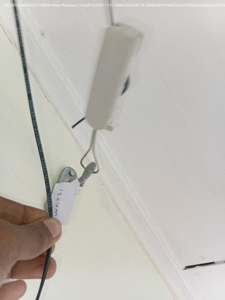

Displaying image: 1751437439539.jpg


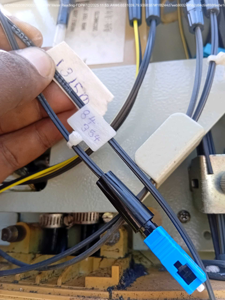

In [48]:
print("\n--- Displaying uploaded images (resized) ---")
for image_name, image_bytes in uploaded.items():
    print(f"Displaying image: {image_name}")
    try:
        image = Image.open(io.BytesIO(image_bytes))
        max_width = 300
        max_height = 300
        image.thumbnail((max_width, max_height))
        display(image)
    except Exception as e:
        print(f"Could not display image {image_name}: {e}")